<a href="https://colab.research.google.com/github/bamdada/AWS-ML-uni/blob/master/Stats_Using_Python_Hypothesis_Testing_(1_Sample_t_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis Testing Example** -- Energy Costs

You work on a political campaign and support an incumbent.  You want to debunk a claim from a rival that energy costs went up in the last year. (Last year, the average monthly energy bill was $200.) You randomly sample 25 families and record their energy costs for the current year.  You will use a **1-sample t-test**, since you will study one sample mean's against a target (last year's monthly energy costs).

### Import Python Libraries

Python libraries help to extend the Python programming language -- or to help make our tasks easier.  There are *lots* of Python libraries and they do *lots* of different things.  For our purposes, we will import **"pandas"** to load and manipulate data, **"seaborn"** for visualization, and **"scipy"** for statistics.

In [ ]:
# Import the appropriate Python libraries.
import pandas as pd
import seaborn as sns
from scipy import stats

### Load Data (Option #1)

One of the biggest challenges that people run into with Google Colab is loading data.  For simplicity, our dataset from this example has already been stored in the cloud on Github.  (We also used a URL shortener to make it easier to type.)  To see what this file looks like, you can copy the following link (http://bit.ly/energy_bills) and paste into your browser window.  Another option for loading your data is from your own hard drive.  (See option #2 below.)

In [ ]:
# Load the CSV file into a dataframe.
df_energy = pd.read_csv('http://bit.ly/energy_bills')

### Load Data (Option #2)

You can also load data into Google Colab from your own computer.  To do so, once you have the file downloaded from [here](https://drive.google.com/file/d/15vSkbWLPTjnof4qT1b0Q6az3o69rbiRQ/view?usp=sharing), (1) run the next cell to select where the file is located on your hard drive and (2) run the cell after to load the CSV file into a dataframe.  (Ensure that the name of the file is spelled correctly in the second cell below.)

In [ ]:
# Select where data file is located on our local drive.
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load the CSV file into a dataframe.
import io
df_energy = pd.read_csv(io.BytesIO(uploaded['energy_data.csv']))

### Explore the Data

As we explore the data, we will use the **"head"** function to preview the first few records.  Then, we'll use **"describe"** to calculate descriptive statistics and **seaborn** to generate a histogram of energy costs.

In [ ]:
# Preview the first few records of data.
df_energy.head()

,Family ID,Energy Cost
0,1,211
1,2,572
2,3,558
3,4,250
4,5,478


In [ ]:
# Generate descriptive stats.
df_energy.describe()

,Family ID,Energy Cost
count,25.000000,25.000000
mean,13.000000,330.560000
std,7.359801,154.177679
min,1.000000,77.000000
25%,7.000000,205.000000
50%,13.000000,320.000000
75%,19.000000,435.000000
max,25.000000,676.000000


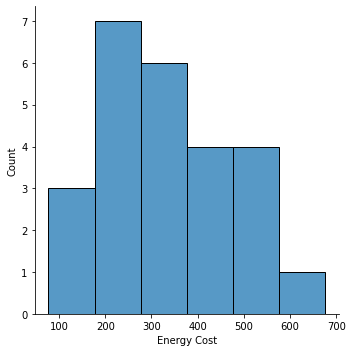

In [ ]:
# Generate a histogram of "energy cost".
sns.displot(df_energy, x="Energy Cost");

### Perform a Normality Test

Prior to performing a hypothesis test, we perform a normality test.  It helps us understand what hypothesis test would be appropriate.  After conducting this test, if the *p-value* is greater than 0.05, the data is normal enough for our purposes.  **Based on the result below, we assume the data is normal.**

In [ ]:
# Peform a normality test.
stats.normaltest(df_energy['Energy Cost'])

NormaltestResult(statistic=0.9090006917845799, pvalue=0.6347650516910424)

### Perform a 1-sample t-test

When we conduct this hypothesis test, if the p-value is > 0.05, we "fail to reject the null" and assume no differences between the sample and a target.  When the p-value is < 0.05, we "reject the null" and state there is a difference.  **Based on the result below, we reject the null.  Energy costs did change, and based on the descriptive stats above (the average monthly cost in the sample was $330), energy costs did go up!**

In [ ]:
# Perform a 1-sample t-test.
stats.ttest_1samp(df_energy['Energy Cost'], 200)

Ttest_1sampResult(statistic=4.234075935744192, pvalue=0.0002911970792752857)